## Calculate differences
- Calculate differences using different models on the effect of Trauma vs. Sad on amygdala (later hippocampus and vmPFC)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

# regular GLMs
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
## Load amygdala database
df = pd.read_csv('TraumavsNeutral_threeSes.csv')
# create a long format for analysis
df_long = pd.melt(df, id_vars=['scr_id','groupIdx'], value_vars=['amg1','amg2','amg3'])
df_long

,scr_id,groupIdx,variable,value
0,KPE008,1,amg1,0.384864
1,KPE1223,1,amg1,0.072214
2,KPE1253,0,amg1,-0.142767
3,KPE1263,0,amg1,-0.254799
4,KPE1293,1,amg1,-0.054429
...,...,...,...,...
73,KPE1561,0,amg3,0.184200
74,KPE1573,1,amg3,0.391631
75,KPE1578,0,amg3,-0.246893
76,KPE1587,1,amg3,NaN


In [6]:
pg.ttest(df.amg2[df.groupIdx==1], df.amg2[df.groupIdx==0], paired=False, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.644598,23,two-sided,0.014484,"[-0.62, -0.08]",1.058687,3.918,0.716666


In [7]:
pg.ttest(df.amg1[df.groupIdx==1], df.amg1[df.groupIdx==0], paired=False, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.520308,24,two-sided,0.607616,"[-0.4, 0.24]",0.204082,0.401,0.079073


In [8]:
pg.ttest(df.amg3[df.groupIdx==1], df.amg3[df.groupIdx==0], correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.904562,20,two-sided,0.071321,"[-0.63, 0.03]",0.815485,1.331,0.441659


# Run Sensitivity Analysis

In [125]:
df_second = df_long[df_long['variable']=='amg2']
# generate subject names arrays
ketSubjects = df_second.scr_id[df_second.groupIdx==1].values
midSubjects = df_second.scr_id[df_second.groupIdx==0].values

tvals = [] # keep t values
dvals = [] # keep cohen's d values
pvals = [] # keep p-values
for i in np.arange(1000):
    
    # randomly remove two subjects from each group
    ketOmit = np.random.choice(ketSubjects, 2)
    midOmit = np.random.choice(midSubjects,2)
    sub_omit = np.hstack([ketOmit, midOmit])

    # remove subjects from data
    indexNames = df_second[df_second['scr_id'].isin(sub_omit)].index
    dfNew = df_second.drop(indexNames)
    dfNew = dfNew.dropna()
    dfNew
    # run t-test
    test = pg.ttest(dfNew['value'][dfNew.groupIdx==1], dfNew['value'][dfNew.groupIdx==0], paired=False, correction=False)
    tvals.append(test['T'][0])
    dvals.append(test['cohen-d'][0])
    pvals.append(test['p-val'][0])

Percent above d=0.9 0.811


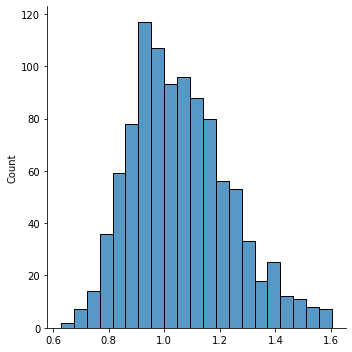

In [129]:
sns.displot(dvals, label="cohen's-d")
dvals = np.array(dvals)
print(f'Percent above d=0.9 {sum(dvals>=0.9) / len(dvals)}')

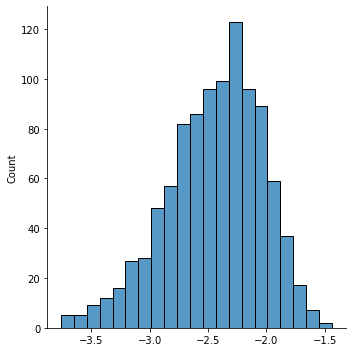

In [127]:
sns.displot(tvals, label="t")
#

Percent below 0.05 is 0.798


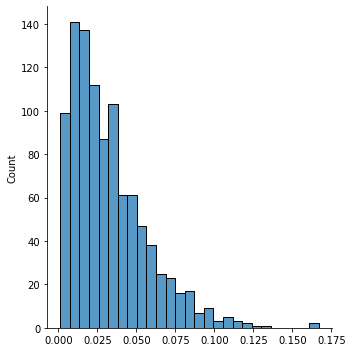

In [128]:
sns.displot(pvals, label="p")
pvals = np.array(pvals)
print(f'Percent below 0.05 is {sum(pvals<0.05) / len(pvals)}')